<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme des régions de confiance </h1>
</center>

# Régions de confiance avec Pas de Cauchy 

## Implémentation 

1. Coder l'algorithme du pas de Cauchy dans le fichier `src/cauchy.jl`). La spécification de cet algorithme est donnée dans le fichier.
2. Ecrire des tests exhaustifs (qui testent tous les cas de figure possibles) pour votre algorithme du pas de Cauchy. Vous remplirez pour cela le fichier `test/tester_cauchy.jl` sur le modèle des autres fichiers de tests et vous exécuterez dans la cellule de code ci-après ces tests.

In [1]:
include("../src/cauchy.jl")         # votre algorithme
include("../test/tester_cauchy.jl") # la fonction pour tester votre algorithme

#
tester_cauchy(cauchy); # tester l'algorithme

Test Summary: | Pass  Total  Time
Pas_De_Cauchy |    4      4  0.4s


3. Coder l'algorithme des régions de confiance (fichier `src/regions_de_confiance.jl`). Sa spécification est donnée dans le fichier.
4. Vérifier que les tests ci-dessous passent.

In [1]:
include("../src/Regions_De_Confiance.jl")
include("../test/tester_rc_cauchy.jl")

#
afficher = false # si true, alors affiche les résultats des algorithmes

#
tester_rc_cauchy(regions_de_confiance, afficher);

Affichage des résultats des algorithmes : false



Test Summary:        | Pass  Total  Time
RC et pas de Cauchy  |   15  

   15  2.3s


## Interprétation 

<!-- Pour ces questions, des représentations graphiques sont attendues pour corroborer vos réponses. -->

1. Soit la fonction $f_1 \colon \mathbb{R}^3 \to \mathbb{R}$ définie par
$$ 
    f_1(x_1,x_2, x_3) = 2 (x_1 +x_2 + x_3 -3)^2 + (x_1-x_2)^2 + (x_2 - x_3)^2
$$ 
Quelle relation lie la fonction $f_1$ et son modèle de Taylor à l’ordre 2 ? Comparer alors les performances de l'algorithme de Newton et celui des régions de confiance avec le pas de Cauchy sur cette fonction.

2. Le rayon initial de la région de confiance est un paramètre important dans l’analyse
de la performance de l’algorithme. Sur quel(s) autre(s) paramètre(s) peut-on jouer
pour essayer d’améliorer cette performance ? Étudier l’influence d’au moins deux de
ces paramètres. Pour cela vous ferez des tests numériques et donnerez les résultats sous forme de tableaux et de graphiques.

### question 1 : Soit la fonction $f_1 \colon \mathbb{R}^3 \to \mathbb{R}$ définie par
$$ 
    f_1(x_1,x_2, x_3) = 2 (x_1 +x_2 + x_3 -3)^2 + (x_1-x_2)^2 + (x_2 - x_3)^2
$$ 
Quelle relation lie la fonction $f_1$ et son modèle de Taylor à l’ordre 2 ? Comparer alors les performances de l'algorithme de Newton et celui des régions de confiance avec le pas de Cauchy sur cette fonction.

On a $f_1$ est une forme quadratique,  égale à son développement de Taylor à l’ordre 2:
$$f(x_1+s_1,x_2+s_2, x_3+s_3) = 3x_1^2+4x_2^2+3x_3^2+2x_1x_2+4x_1x_3+2x_2x_3-12(x_1+x_2+x_3) + 6x_1s_1+2x_2s_1+4x_3s_1+2x_1s_2+8x_2s_2+2x_3s_2+4x_1s_3+2x_2s_3+6x_3s_3-12(s_1+s_2+s_3)$$


In [13]:
include("../test/fonctions_de_tests.jl")
include("../src/newton.jl")
include("../src/cauchy.jl")
include("../src/Regions_De_Confiance.jl")


# Tests : Algorithme de Newton
println("\nAlgorithme de Newton\n")
_, _, flag, nb_iters = newton(fct1,grad_fct1,hess_fct1,[1515;205;8])
println("\nTest 1 : flag ",flag," nb_iters ",nb_iters)
_, _, flag, nb_iters = newton(fct1,grad_fct1,hess_fct1,[5;-25;8982])
println("\nTest 2 : flag ",flag," nb_iters ",nb_iters)
_, _, flag, nb_iters = newton(fct1,grad_fct1,hess_fct1,[1;0;-1])
println("\nTest 3 : flag ",flag," nb_iters ",nb_iters)
# Tests : Algorithme cauchy
println("\nPas de Cauchy\n")
_,_, flag, nb_iters  = regions_de_confiance(fct1,grad_fct1,hess_fct1,[1515;205;8],algo_pas = "cauchy")
println("\nTest 1 : flag ",flag," nb_iters ",nb_iters)
_,_, flag, nb_iters  = regions_de_confiance(fct1,grad_fct1,hess_fct1,[5;-25;8982],algo_pas = "cauchy")
println("\nTest 2 : flag ",flag," nb_iters ",nb_iters)
_,_, flag, nb_iters  = regions_de_confiance(fct1,grad_fct1,hess_fct1,[1;0;-1],algo_pas = "gct")
println("\nTest 3 : flag ",flag," nb_iters ",nb_iters)



Algorithme de Newton


Test 1 : flag 0 nb_iters 1

Test 2 : flag 0 nb_iters 1

Test 3 : flag 0 nb_iters 1

Pas de Cauchy


Test 1 : flag 

0 nb_iters 183

Test 2 : flag 0 nb_iters 1047

Test 3 : flag 

0 nb_iters 2


Pour ce type de fonction , on remarque que l'algorithme de Newton converge toujours à la première itération tandis que RC-Pas de Cauchy se termine par convergence mais prend beaucoup de temps et un grand nombre d'itération. On peut donc remarquer que l'algorithme de Newton est plus efficace que la méthode RC-Pas de Cauchy.


### Question 2 : 

In [ ]:
# Expérimentations numériques à faire ici
# Vous pouvez utiliser le package Plots pour les affichages de courbes: using Plots
using Pkg;
Pkg.add("Plots"); 
using Plots


 tableau d'iteration pour des valeurs de gamma2 croissante:Any[85, 45, 46, 43, 44, 47, 44, 50, 57, 53]

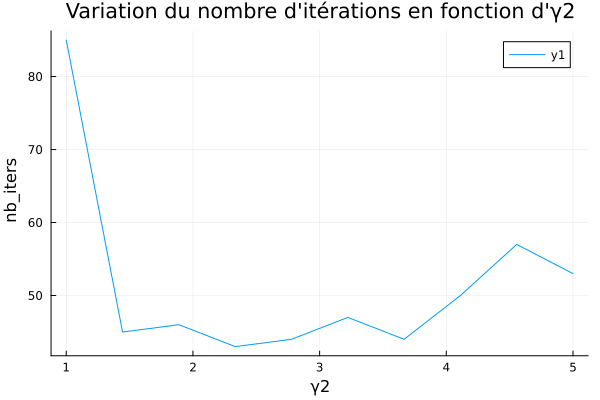

In [25]:
using LinearAlgebra
using Markdown                             # Pour que les docstrings en début des fonctions ne posent
using Plots
                                           # pas de soucis. Ces docstrings sont utiles pour générer 
                                           # la documentation sous GitHub
include("../src/cauchy.jl")
include("../src/Regions_De_Confiance.jl")
include("../src/gct.jl")


# Fonction f1
# -----------
f1(x) = 2 * (x[1] + x[2] + x[3] - 3) ^ 2 + (x[1] - x[2]) ^ 2 + (x[2] - x[3]) ^ 2
# la gradient de la fonction f0
grad_f1(x) = [4*(x[1]+x[2]+x[3]−3)+2*(x[1]−x[2]);4*(x[1]+x[2]+x[3]−3)-2*(x[1]−x[2])+2*(x[2]−x[3]);4*(x[1]+x[2]+x[3]−3)-2*(x[2]−x[3])]
# la hessienne de la fonction f0
hess_f1(x) = [6 2 4; 2 8 2; 4 2 6]
sol_exacte = [1 ,1 ,1]
x0 = [-1,100,100]
iters1=[]
iters2=[]
iters3=[]
for gamma2 in range(1,5,10)
   xmin,f_min,flag,nb_iters = regions_de_confiance(f1,grad_f1,hess_f1,x0,algo_pas ="cauchy",γ2 = gamma2 )
   iters1 =vcat(iters1,nb_iters)   
end
for eta2 in range(0.1,4,11)
   xmin,f_min,flag,nb_iters = regions_de_confiance(f1,grad_f1,hess_f1,x0,algo_pas ="cauchy",η2 = eta2 )
   iters2 =vcat(iters2,nb_iters)   
end
for gamma1 in range(0.1,1,9)
   xmin,f_min,flag,nb_iters = regions_de_confiance(f1,grad_f1,hess_f1,x0,algo_pas ="cauchy",γ2 = eta1 )
   iters3 =vcat(iters3,nb_iters)   
end
print("\n tableau d'iteration pour des valeurs de gamma2 croissante:")
print(iters1)
plot(range(1,5,10),iters1, title="Variation du nombre d'itérations en fonction d'γ2")
xlabel!("γ2")
ylabel!(" nb_iters")


On remarque que l'augmentation de $\gamma_2$ conduit à l'augmentation de performanace.


 tableau d'iteration pour des valeurs de eta2 croissante:Any[45, 45, 45, 85, 85, 85, 85, 85, 85, 85]

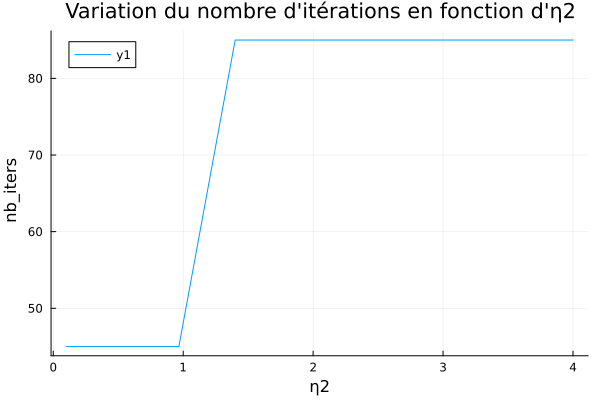

In [28]:
using LinearAlgebra
using Markdown                             # Pour que les docstrings en début des fonctions ne posent
using Plots
                                           # pas de soucis. Ces docstrings sont utiles pour générer 
                                           # la documentation sous GitHub
include("../src/cauchy.jl")
include("../src/Regions_De_Confiance.jl")
include("../src/gct.jl")


# Fonction f1
# -----------
f1(x) = 2 * (x[1] + x[2] + x[3] - 3) ^ 2 + (x[1] - x[2]) ^ 2 + (x[2] - x[3]) ^ 2
# la gradient de la fonction f0
grad_f1(x) = [4*(x[1]+x[2]+x[3]−3)+2*(x[1]−x[2]);4*(x[1]+x[2]+x[3]−3)-2*(x[1]−x[2])+2*(x[2]−x[3]);4*(x[1]+x[2]+x[3]−3)-2*(x[2]−x[3])]
# la hessienne de la fonction f0
hess_f1(x) = [6 2 4; 2 8 2; 4 2 6]
sol_exacte = [1 ,1 ,1]
x0 = [-1,100,100]
iters1=[]
iters2=[]
iters3=[]
for gamma2 in range(1,5,10)
   xmin,f_min,flag,nb_iters = regions_de_confiance(f1,grad_f1,hess_f1,x0,algo_pas ="cauchy",γ2 = gamma2 )
   iters1 =vcat(iters1,nb_iters)   
end
for eta2 in range(0.1,4,10)
   xmin,f_min,flag,nb_iters = regions_de_confiance(f1,grad_f1,hess_f1,x0,algo_pas ="cauchy",η2 = eta2 )
   iters2 =vcat(iters2,nb_iters)   
end
for gamma1 in range(0.1,1,9)
   xmin,f_min,flag,nb_iters = regions_de_confiance(f1,grad_f1,hess_f1,x0,algo_pas ="cauchy",γ2 = eta1 )
   iters3 =vcat(iters3,nb_iters)   
end

print("\n tableau d'iteration pour des valeurs de eta2 croissante:")
print(iters2)
plot(range(0.1,4,10),iters2, title="Variation du nombre d'itérations en fonction d'η2")
xlabel!("η2")
ylabel!(" nb_iters")


Lorsque $\eta_2$ depasse 1, on remarque que l'augmentation de  $\eta_2$ entraine le nombre d'itérations


 tableau d'iteration pour des valeurs de gamma1 croissante:Any[45, 45, 45, 45, 45, 45, 45, 45, 45]

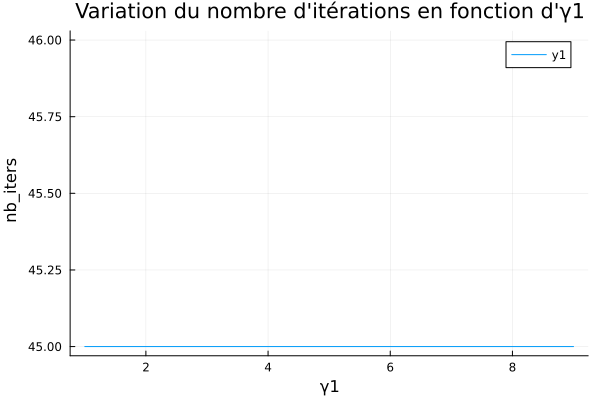

In [27]:
using LinearAlgebra
using Markdown                             # Pour que les docstrings en début des fonctions ne posent
using Plots
                                           # pas de soucis. Ces docstrings sont utiles pour générer 
                                           # la documentation sous GitHub
include("../src/cauchy.jl")
include("../src/Regions_De_Confiance.jl")
include("../src/gct.jl")


# Fonction f1
# -----------
f1(x) = 2 * (x[1] + x[2] + x[3] - 3) ^ 2 + (x[1] - x[2]) ^ 2 + (x[2] - x[3]) ^ 2
# la gradient de la fonction f0
grad_f1(x) = [4*(x[1]+x[2]+x[3]−3)+2*(x[1]−x[2]);4*(x[1]+x[2]+x[3]−3)-2*(x[1]−x[2])+2*(x[2]−x[3]);4*(x[1]+x[2]+x[3]−3)-2*(x[2]−x[3])]
# la hessienne de la fonction f0
hess_f1(x) = [6 2 4; 2 8 2; 4 2 6]
sol_exacte = [1 ,1 ,1]
x0 = [-1,100,100]
iters1=[]
iters2=[]
iters3=[]
for gamma2 in range(1,5,10)
   xmin,f_min,flag,nb_iters = regions_de_confiance(f1,grad_f1,hess_f1,x0,algo_pas ="cauchy",γ2 = gamma2 )
   iters1 =vcat(iters1,nb_iters)   
end
for eta2 in range(0.1,4,11)
   xmin,f_min,flag,nb_iters = regions_de_confiance(f1,grad_f1,hess_f1,x0,algo_pas ="cauchy",η2 = eta2 )
   iters2 =vcat(iters2,nb_iters)   
end
for gamma1 in range(0.1,1,9)
   xmin,f_min,flag,nb_iters = regions_de_confiance(f1,grad_f1,hess_f1,x0,algo_pas ="cauchy",γ1 = eta1 )
   iters3 =vcat(iters3,nb_iters)   
end

print("\n tableau d'iteration pour des valeurs de gamma1 croissante:")
print(iters3)
plot(iters3, title="Variation du nombre d'itérations en fonction d'γ1")
xlabel!("γ1")
ylabel!(" nb_iters")

On remarque que $\gamma_1$ n'influence pas la performance de l'algorithme.

# Régions de confiance avec gradient conjugué tronqué

## Implémentation 

1. Implémenter l’algorithme du gradient conjugué tronqué (fichier `src/gct.jl`). Sa spécification est dans le fichier.
2. Vérifier que les tests ci-dessous passent.

In [3]:
include("../src/gct.jl")
include("../test/tester_gct.jl")

#
tester_gct(gct);

Test Summary:             | Pass  Total  Time
Gradient conjugué tronqué |    9      9  0.0s


3. Intégrer l’algorithme du gradient conjugué tronqué dans le code des régions de confiance.
4. Vérifier que les tests ci-dessous passent.

In [4]:
include("../src/Regions_De_Confiance.jl")
include("../test/tester_rc_gct.jl")

#
afficher = false # si true, alors affiche les résultats des algorithmes

#
tester_rc_gct(regions_de_confiance, afficher);

Affichage des résultats des algorithmes : false



Test Summary: | Pass  Total  Time
RC et gct     |   15     15  0.6s


## Interprétation  

Nous proposons de comparer l'utilisation du pas de Cauchy avec celle du gradient conjugué tronqué dans l'algorithme des régions de confiance.

**Remarques.**
* Nous vous demandons de réaliser des expérimentations numériques pour les comparaisons demandées ci-après.
* Vous devez utiliser l'argument optionnel `max_iter_gct` et la sortie `xs` de l'algorithme des régions de confiance.
* Vous pouvez comparer l'écart en norme entre les itérés de l'algorithme et la solution du problème.
* Vous trouverez des choses utiles dans le fichier `test/fonctions_de_tests.jl`.

1. Comparer dans le cas où l'on force le gradient conjugué tronqué à ne faire qu'une seule itération. Que remarquez vous ?
2. Comparer dans le cas général. Que remarquez vous ?
3. Quels sont les avantages et inconvénients des deux approches ?

In [3]:
# Expérimentations numériques à faire ici.
# Vous pouvez utiliser le package Plots pour les affichages de courbes: using Plots

include("../src/gct.jl")
include("../test/tester_gct.jl")
include("../test/tester_rc_gct.jl")
include("../src/Regions_De_Confiance.jl")
include("../test/fonctions_de_tests.jl")
include("../test/tester_rc_cauchy.jl")

tol_erreur = 1e-2
afficher=true
# Test with gct
x_sol, f_sol, flag, nb_iters, xs = regions_de_confiance(fct1, grad_fct1, hess_fct1, pts1.x011, algo_pas="gct", max_iter_gct=1)
afficher_resultats("RC et gct " , "f1", pts1.x011, x_sol, f_sol, flag, nb_iters, sol_exacte_fct1)
println("xs=",xs)

x_sol, f_sol, flag, nb_iters, xs = regions_de_confiance(fct1, grad_fct1, hess_fct1, pts1.x012, algo_pas="gct", max_iter_gct=1)
afficher_resultats("RC et gct" , "f1", pts1.x012, x_sol, f_sol, flag, nb_iters, sol_exacte_fct1)
println("xs=",xs)

# Test with Cauchy 
x_sol, f_sol, flag, nb_iters, xs = regions_de_confiance(fct1, grad_fct1, hess_fct1, pts1.x011, algo_pas="cauchy")
afficher_resultats("RC et cauchy", "f1", pts1.x011, x_sol, f_sol, flag, nb_iters, sol_exacte_fct1)
println("xs=",xs)

x_sol, f_sol, flag, nb_iters, xs = regions_de_confiance(fct1, grad_fct1, hess_fct1, pts1.x012, algo_pas="cauchy")
afficher_resultats("RC et cauchy", "f1", pts1.x012, x_sol, f_sol, flag, nb_iters, sol_exacte_fct1)
println("xs=",xs)


-------------------------------------------------------------------------


Résultats de : RC et gct  appliqué à f1:
  * x0       = [1, 0, 0]
  * x_sol    = 

[1.0000000000000007, 1.0, 1.0]
  * f(x_sol) = 2.0214560696288428e-30
  * nb_iters = 

1
  * flag     = 0
  * solution = [1, 1, 1]
xs=

[[1.0, 0.0, 0.0], [1.0000000000000007, 1.0, 1.0]]


-------------------------------------------------------------------------
Résultats de : RC et gct appliqué à f1:
  * x0       = [10.0, 3.0, -2.2]
  * x_sol    = [1.0, 1.0, 1.0]
  * f(x_sol) = 0.0
  * nb_iters = 3
  * flag     = 0
  * solution = [1, 1, 1]
xs=[[10.0

, 3.0, -2.2], [8.411206090525074, 2.029851506603806, -2.9311264008203204], [4.6696497551530864, 0.6289753646455329, -3.126835941031943], [1.0, 1.0, 1.0]]
-------------------------------------------------------------------------
Résultats de : RC et cauchy appliqué à f1:
  * x0       = [1, 0, 0]
  * x_sol    = [1.0000065049853921, 1.000000873235793, 0.9999952414861938]
  * f(x_sol) = 7.71589405988668e-11
  * nb_iters = 33
  * flag     = 2
  * solution = [1, 1, 1]
xs=[[1.0, 0.0, 0.0], [1.5119453924914676, 0.8532423208191127, 0.6825938566552902], [1.164161263874174, 1.0342159624072973, 0.71721490113303], [1.1761639059934348, 1.0285837043966306, 0.8672282456595428], [1.0999764407008452, 0.9873641417000757, 0.8717764521530398], [1.0902628334040312, 1.0121755024711798, 0.9339236573214158], [1.0508295348418686, 0.9931170255791971, 0.9353690508676018], [1.045682769964817, 1.006133198409318, 0.9665816664199046], [1.0257205425784983, 0.9965116619455212, 0.9673023586889253], [1.0231137354698971, 

0.9956716280674651], [1.0033313889711948, 0.9995481647261916, 0.9957649404804733], [1.0029937411038239, 1.000401882822072, 0.9978100245402803], [1.0016855437121803, 0.9997713902184164, 0.9978572367246438], [1.0015147079902444, 1.0002033359267226, 0.9988919638632001], [1.0008528147358773, 0.9998843329964725, 0.9989158512570675], [1.000766378994087, 1.000102879488315, 0.9994393799825432], [1.0004314886457546, 0.9999414773260699, 0.9994514660063852], [1.000387755769667, 1.0000520527251953, 0.9997163496807234], [1.0002183152372757, 0.9999703899706962, 0.9997224647041169], [1.0001961882281094, 1.0000263365054067, 0.9998564847827042], [1.000110458393971, 0.999985018561585, 0.9998595787291988], [1.0000992630512804, 1.0000133251720142, 0.9999273872927483], [1.0000558873349883, 0.999992420017735, 0.9999289527004819], [1.0000502229590658, 1.000006741980626, 0.9999632610021865], [1.0000282766578419, 0.9999961648454879, 0.999964053033134], [1.0000254107201498, 1.000003411160675, 0.9999814116012001

-2.2]
  * x_sol    = [1.000003643199092, 0.9999997146801121, 0.9999957861612833]
  * f(x_sol) = 3.233185493810428e-11
  * nb_iters = 34
  * flag     = 2
  * solution = [1, 1, 1]
xs=[[10.0, 3.0, -2.2], [8.411206090525074, 2.029851506603806, -2.9311264008203204], [5.2923542923523605, 0.4909036606631352, -3.7530782760847106], [3.9226074902360915, 1.6860939604203804, -0.793413832544708], [2.725047885384111, 0.8954411266185686, -1.0283637246420687], [2.2435061991273986, 1.2381491527217003, 0.27281499384653296], [1.7296210405175474, 0.9379241446511708, 0.16170988287103077], [1.5160502103545563, 1.1072660414561537, 0.6919303838053317], [1.3035937073489405, 0.9770368103209467, 0.6479463306435801], [1.2164606693562714, 1.0435864489805255, 0.8717836436126467], [1.127218114208409, 0.9899042188737347, 0.8530046390022976], [1.0904291160648074, 1.0184371753416648, 0.946270043493509], [1.053167934194879, 0.9958578176635138, 0.938479955358469], [1.0378384939912104, 1.0076772616075045, 0.97754467474926

1.0002025187837458, 1.0000411462359822, 0.9998797742356311], [1.0001190580938717, 0.9999906758092579, 0.9998622937363264], [1.0000847024680153, 1.0000172093242645, 0.9999497160910065], [1.000049795462743, 0.9999961002424803, 0.9999424049876056], [1.0000354264143225, 1.0000071977009213, 0.9999789690021553], [1.0000208267195507, 0.9999983689381956, 0.9999759111624997], [1.0000148169284024, 1.0000030104071216, 0.9999912038834476], [1.0000087106761566, 0.9999993178172312, 0.9999899249573803], [1.0000061971102843, 1.0000012590880412, 0.9999963210661893], [1.000003643199092, 0.9999997146801121, 0.9999957861612833]]


 En forçant une seule itération du gct, la méthode converge vers la solution. Par contre, on remarque que la methode du gradient est plus rapide.

In [35]:
include("../src/gct.jl")
include("../test/tester_gct.jl")
include("../test/tester_rc_gct.jl")
include("../src/Regions_De_Confiance.jl")
include("../test/fonctions_de_tests.jl")
include("../test/tester_rc_cauchy.jl")

tol_erreur = 1e-2
algo_pas = "gct"
afficher=true

x_sol, f_sol, flag, nb_iters, _ = regions_de_confiance(fct1, grad_fct1, hess_fct1, pts1.x011, algo_pas=algo_pas)
afficher_resultats("RC et " * algo_pas, "f1", pts1.x011, x_sol, f_sol, flag, nb_iters, sol_exacte_fct1)

x_sol, f_sol, flag, nb_iters  = regions_de_confiance(fct1, grad_fct1, hess_fct1, pts1.x012, algo_pas=algo_pas)
afficher_resultats("RC et " * algo_pas, "f1", pts1.x012, x_sol, f_sol, flag, nb_iters, sol_exacte_fct1)

x_sol, f_sol, flag, nb_iters, _ = regions_de_confiance(fct2, grad_fct2, hess_fct2, pts1.x021, algo_pas=algo_pas)
afficher_resultats("RC et " * algo_pas, "f2", pts1.x021, x_sol, f_sol, flag, nb_iters, sol_exacte_fct2)

x_sol, f_sol, flag, nb_iters, _ = regions_de_confiance(fct2, grad_fct2, hess_fct2, pts1.x022, algo_pas=algo_pas)
afficher_resultats("RC et " * algo_pas, "f2", pts1.x022, x_sol, f_sol, flag, nb_iters, sol_exacte_fct2)

x_sol, f_sol, flag, nb_iters, _ = regions_de_confiance(fct2, grad_fct2, hess_fct2, pts1.x023, algo_pas=algo_pas)
afficher_resultats("RC et " * algo_pas, "f2", pts1.x023, x_sol, f_sol, flag, nb_iters, sol_exacte_fct2)

tester_rc_cauchy(regions_de_confiance, afficher);

-------------------------------------------------------------------------
Résultats de : RC et gct appliqué à f1:
  * x0       = [1, 0, 0]
  * x_sol    = [1.0000000000000007, 1.0, 1.0]
  * f(x_sol) = 2.0214560696288428e-30
  * nb_iters = 1
  * flag     = 0
  * solution = [1, 1, 1]


-------------------------------------------------------------------------
Résultats de : RC et gct appliqué à f1:
  * x0       = [10.0, 3.0, -2.2]
  * x_sol    = [1.0, 1.0, 1.0]
  * f(x_sol) = 0.0
  * nb_iters = 3
  * flag     = 0
  * solution = [1, 1, 1]


-------------------------------------------------------------------------
Résultats de : RC et gct appliqué à f2:
  * x0       = [-1.2, 1.0]
  * x_sol    = [0.9999996743780089, 0.9999993478371609]
  * f(x_sol) = 1.0611413038132374e-13
  * nb_iters = 31
  * flag     = 0
  * solution = [1, 1]
-------------------------------------------------------------------------
Résultats de : RC et gct appliqué à f2:
  * x0       = [10, 0]
  * x_sol    = [1.0000035183009863, 1.0000066949336202]
  * f(x_sol) = 2.4053014026923312e-11
  * nb_iters = 44
  * flag     = 0
  * solution = [1, 1]
-------------------------------------------------------------------------
Résultats de : RC et gct appliqué à f2:
  * x0       = [0.0, 0.0050000000010000005]
  * x_sol    = [0.9999999999998994, 0.9999999999996207]
  * f(x_sol) = 3.1813581453548166e-24
  * nb_iters = 19
  * flag     = 0
  * solution = [1, 1]
Affichage des résultats des algorithmes : 

true

-------------------------------------------------------------------------
Résultats de : RC et cauchy appliqué à f1:
  * x0       = [1, 0, 0]
  * x_sol    = [1.0000065049853921, 1.000000873235793, 0.9999952414861938]
  * f(x_sol) = 7.71589405988668e-11
  * nb_iters = 33
  * flag     = 2
  * solution = [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : RC et cauchy appliqué à f1:
  * x0       = [10.0, 3.0, -2.2]
  * x_sol    = [1.000003643199092, 0.9999997146801121, 0.9999957861612833]
  * f(x_sol) = 3.233185493810428e-11
  * nb_iters = 34
  * flag     = 2
  * solution = [1, 1, 1]


-------------------------------------------------------------------------
Résultats de : RC et cauchy appliqué à f2:
  * x0       = [-1.2, 1.0]
  * x_sol    = [0.9993529198218126, 0.9987042941944867]
  * f(x_sol) = 4.190985501982084e-7
  * nb_iters = 5000
  * flag     = 3
  * solution = [1, 1]
-------------------------------------------------------------------------
Résultats de : RC et cauchy appliqué à f2:
  * x0       = [10, 0]
  * x_sol    = [0.9961677295959247, 0.9923393628794702]
  * f(x_sol) = 1.4697922915267688e-5
  * nb_iters = 864
  * flag     = 0
  * solution = [1, 1]
-------------------------------------------------------------------------
Résultats de : RC et cauchy appliqué à f2:
  * x0       = [0.0, 0.0050000000010000005]
  * x_sol    = [0.9998396448646241, 0.999677792835675]
  * f(x_sol) = 2.594560275339002e-8
  * nb_iters = 4512
  * flag     = 2
  * solution = [1, 1]
Test Summary:        | Pass  Total  Time
RC et pas de Cauchy  |   15     15  0.2s


2- Lorsqu'on compare les résultats des tests déjà effectués dans les fichiers (../test/tester_rc_gct.jl) et (../test/tester_rc_cauchy.jl), on observe que le pas de Cauchy nécessite un nombre plus élevé d'itérations. En revanche, le pas de GCT offre une convergence plus rapide.

### question 3 :
 Pas de Cauchy :
 Avantages : moins coûteux.
 
 Inconvénients : Sensible aux problèmes mal conditionnés, convergence lente.

Pas de GCT :
Avantages : Convergence rapide pour problèmes mal conditionnés, la méthode du gradient conjugué tronqué permet d'obtenir un résultat plus proche de la solution.

Inconvénients : Coût computationnel potentiellement plus élevé.
